In [76]:
import matplotlib.pyplot as plt
from datetime import datetime

In [77]:
def parse_training_data(file_path):
    try:
        with open(file_path, 'r') as file:
            # Read the content of the file
            file_content = file.readlines()

            time_list = []
            loss_list = []
            eval_loss_list = []

            for line in file_content:
                try:
                    entry = eval(line)  # Evaluate the string as a Python expression
                    if 'epoch' in entry:
                        # Assuming 'epoch' values are already in seconds
                        epoch_time = entry['epoch']
                        time_list.append(epoch_time)
                        loss_list.append(entry.get('loss', 0))
                        eval_loss_list.append(entry.get('eval_loss', 0))
                except (SyntaxError, ValueError):
                    # Ignore lines that are not valid Python dictionaries
                    pass

    except FileNotFoundError:
        print(f"The file '{file_path}' does not exist.")
        epochs = []
        evals = []
    except Exception as e:
        print(f"An error occurred: {e}")
        epochs = []
        evals = []

    result = [(value, eval_loss_list[i]) for i, value in enumerate(time_list) if eval_loss_list[i] != 0]
    epochs, evals = zip(*result)

    return epochs, evals

In [78]:
epochs_5145193, evals_5145193 = parse_training_data("../LUMI/logs/train/filt/5145193.output")
epochs_5145195, evals_5145195 = parse_training_data("../LUMI/logs/train/filt/5145195.output")
epochs_5145196, evals_5145196 = parse_training_data("../LUMI/logs/train/filt/5145196.output")
epochs_5145197, evals_5145197 = parse_training_data("../LUMI/logs/train/filt/5145197.output")
epochs_5145351, evals_5145351 = parse_training_data("../LUMI/logs/train/filt/5145351.output")
epochs_5145352, evals_5145352 = parse_training_data("../LUMI/logs/train/filt/5145352.output")
epochs_5145353, evals_5145353 = parse_training_data("../LUMI/logs/train/filt/5145353.output")

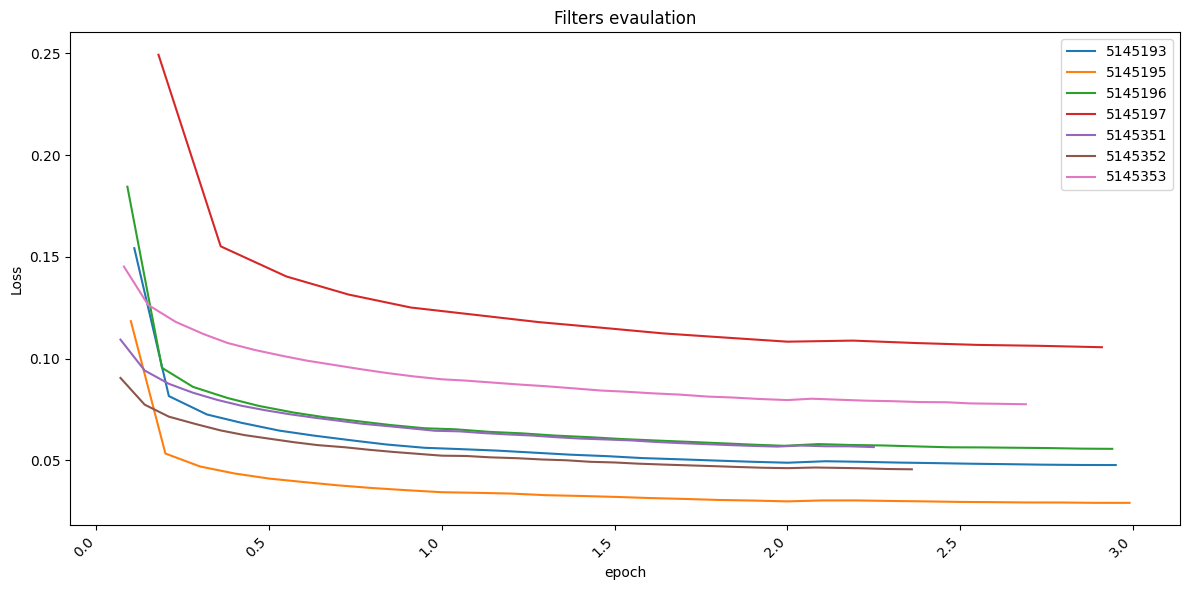

In [79]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.plot(epochs_5145193, evals_5145193, label='5145193')
plt.plot(epochs_5145195, evals_5145195, label='5145195')
plt.plot(epochs_5145196, evals_5145196, label='5145196')
plt.plot(epochs_5145197, evals_5145197, label='5145197')
plt.plot(epochs_5145351, evals_5145351, label='5145351')
plt.plot(epochs_5145352, evals_5145352, label='5145352')
plt.plot(epochs_5145353, evals_5145353, label='5145353')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Filters evaulation')
plt.legend()

# Rotate x-axis text
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed

plt.tight_layout()  # Ensures that labels are not cut off
plt.show()